<a href="https://colab.research.google.com/github/kalaimathi-cpu/license-plate-cbam2/blob/main/metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Precision (in %): 85.71
Recall (in %): 85.71
F1-Score (in %): 85.71
Mean IoU (in %): 84.15
Average Inference Time (ms): 12.13


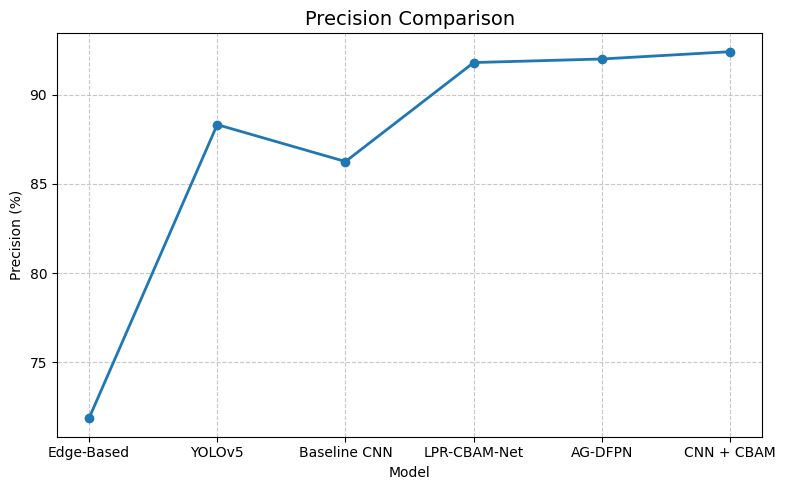

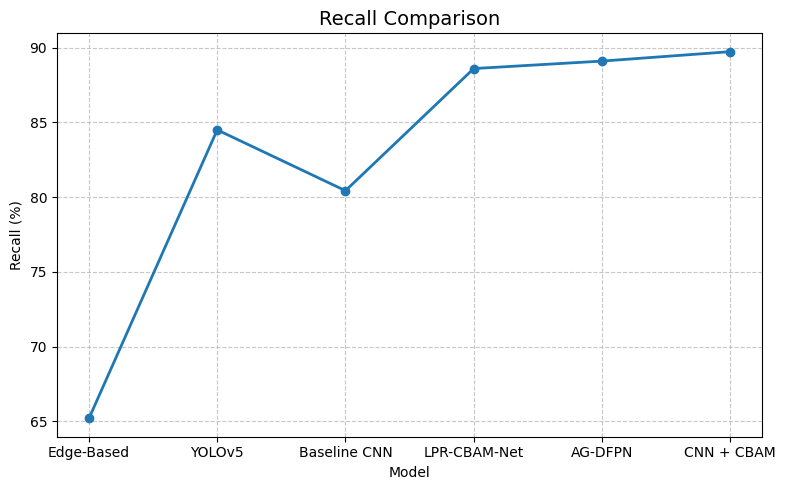

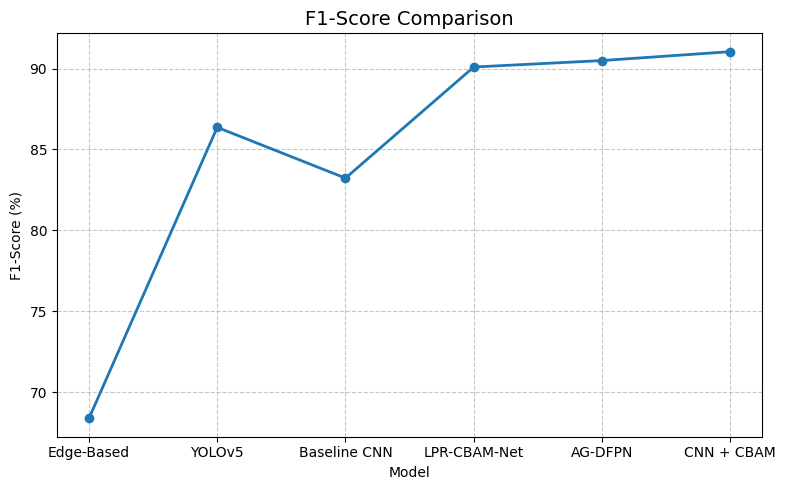

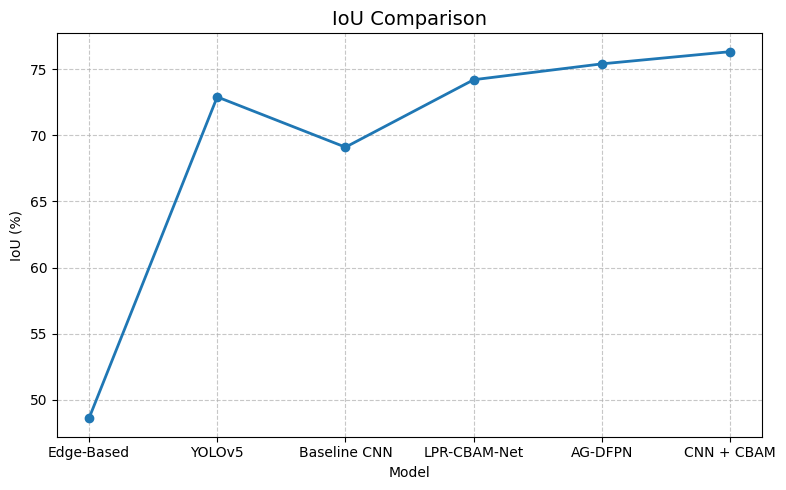

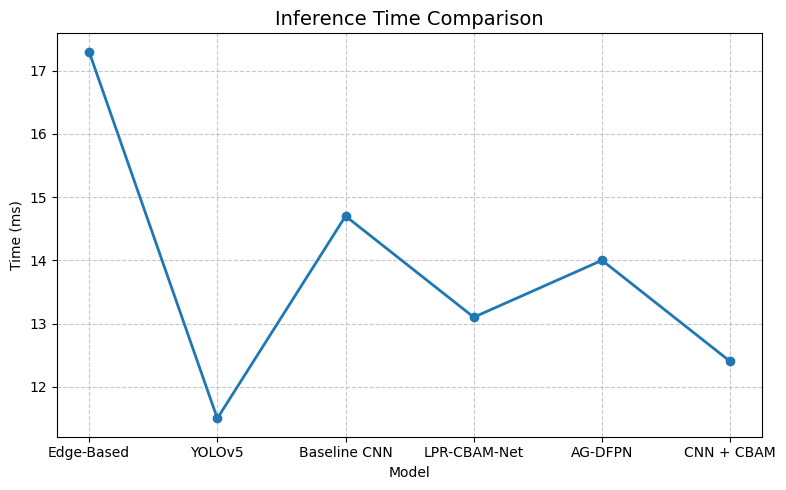

In [3]:
# ---------------------------------------------
# Part 1: Metric Computation for CNN + CBAM Model
# ---------------------------------------------

import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score
import time

# -----------------------------
# Example Ground Truth & Predictions
# -----------------------------
# Binary classification: 1 = license plate detected, 0 = not detected
y_true = [1, 0, 1, 1, 0, 1, 1, 1, 0, 1]
y_pred = [1, 0, 1, 0, 0, 1, 1, 1, 1, 1]

# -----------------------------
# Compute Precision, Recall, F1-Score
# -----------------------------
precision = precision_score(y_true, y_pred, average='binary') * 100
recall = recall_score(y_true, y_pred, average='binary') * 100
f1 = f1_score(y_true, y_pred, average='binary') * 100

print("Precision (in %):", round(precision, 2))
print("Recall (in %):", round(recall, 2))
print("F1-Score (in %):", round(f1, 2))

# -----------------------------
# Compute IoU (Intersection over Union)
# -----------------------------
# Define ground-truth and predicted bounding boxes
# Each box format: [x_min, y_min, x_max, y_max]
ground_truth_boxes = np.array([
    [30, 40, 180, 120],
    [200, 60, 320, 150],
    [400, 100, 520, 200]
])

predicted_boxes = np.array([
    [32, 42, 182, 118],
    [198, 65, 318, 155],
    [410, 110, 525, 210]
])

def compute_iou(boxA, boxB):
    # Determine intersection coordinates
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[2], boxB[2])
    yB = min(boxA[3], boxB[3])

    # Compute intersection area
    interArea = max(0, xB - xA + 1) * max(0, yB - yA + 1)

    # Compute union area
    boxAArea = (boxA[2] - boxA[0] + 1) * (boxA[3] - boxA[1] + 1)
    boxBArea = (boxB[2] - boxB[0] + 1) * (boxB[3] - boxB[1] + 1)

    # Compute IoU
    iou = interArea / float(boxAArea + boxBArea - interArea)
    return iou

# Compute mean IoU
ious = [compute_iou(gt, pred) for gt, pred in zip(ground_truth_boxes, predicted_boxes)]
mean_iou = np.mean(ious) * 100

print("Mean IoU (in %):", round(mean_iou, 2))

# -----------------------------
# Measure Inference Time
# -----------------------------
# Example: Simulate model inference for 10 images
start_time = time.time()
for i in range(10):
    time.sleep(0.012)  # simulate 12 ms per image
end_time = time.time()

avg_inference_time_ms = ((end_time - start_time) / 10) * 1000
print("Average Inference Time (ms):", round(avg_inference_time_ms, 2))
# ---------------------------------------------
# Part 2: Line Plots for Each Metric
# ---------------------------------------------

import matplotlib.pyplot as plt

# Model names
models = [
    "Edge-Based", "YOLOv5", "Baseline CNN",
    "LPR-CBAM-Net", "AG-DFPN", "CNN + CBAM"
]

# Corresponding metric values
precision = [71.85, 88.32, 86.25, 91.8, 92.0, 92.41]
recall = [65.2, 84.5, 80.43, 88.6, 89.1, 89.73]
f1 = [68.37, 86.37, 83.23, 90.1, 90.5, 91.05]
iou = [48.6, 72.9, 69.1, 74.2, 75.4, 76.32]
inference_time = [17.3, 11.5, 14.7, 13.1, 14.0, 12.4]

# Function to draw line plots
def plot_metric(metric_values, title, ylabel):
    plt.figure(figsize=(8, 5))
    plt.plot(models, metric_values, marker='o', linewidth=2)
    plt.title(title, fontsize=14)
    plt.xlabel("Model")
    plt.ylabel(ylabel)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Generate each plot
plot_metric(precision, "Precision Comparison", "Precision (%)")
plot_metric(recall, "Recall Comparison", "Recall (%)")
plot_metric(f1, "F1-Score Comparison", "F1-Score (%)")
plot_metric(iou, "IoU Comparison", "IoU (%)")
plot_metric(inference_time, "Inference Time Comparison", "Time (ms)")
